In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()

## I. Introduction

https://www.kaggle.com/henriqueyamahata/bank-marketing

### Input variables:
* Bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")
* Related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* Other attributes:
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
* Social and economic context attributes
   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric)
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
  21. y - has the client subscribed a term deposit? (binary: "yes","no")

### Missing Attribute Values:
There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


## 0. Introduction

## I. Business Understanding

## II. DATA UNDERSTANDING

In [2]:
# get data banking marketing from file
file_path = "data/bank-additional-full.csv"
marketing_df = pd.read_csv(file_path,sep = ";")
marketing_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
marketing_df.info()

# Thông tin tổng quan về bộ data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [49]:
categorical = marketing_df.dtypes[marketing_df.dtypes == 'object'].index.tolist()
numerical = marketing_df.dtypes[marketing_df.dtypes != 'object'].index.tolist()
print('numerical: '+str(len(numerical))+': '+str(numerical))
print('categorical: '+str(len(categorical))+': '+ str(categorical))

# Danh sách biến số và biến phân loại

numerical: 10: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical: 11: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [94]:
len(marketing_df[marketing_df.duplicated(keep='first')])

# Số dòng trùng nhau

12

In [43]:
#pdays = 999 --> trước đó chưa contacted
# define NA values:

na_lst = ["NA","","#NA","unknown","nonexistent"]
marketing_df = pd.read_csv(file_path, sep=';', na_values = na_lst, keep_default_na = True)

def missing_exploration(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
    return missing_data

missing_exploration(marketing_df)

# Tỉ lệ Missing của các biến

,Total,Percent %
poutcome,35563,86.34
default,8597,20.87
education,1731,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19
y,0,0.00
day_of_week,0,0.00
contact,0,0.00


In [24]:
len(marketing_df[marketing_df['pdays'] == 999])/len(marketing_df) * 100

# Tỉ lệ missing của cột 'pdays'

96.32174419733903

In [74]:
y_cnt = marketing_df.groupby('y').size().iloc[0]
y_name = marketing_df.groupby('y').size().index[0]
n_cnt = marketing_df.groupby('y').size().iloc[1]
n_name = marketing_df.groupby('y').size().index[1]
print("Tỉ lệ "+ str(y_name)+" label: " +str(y_cnt/(y_cnt+n_cnt)))
print("Tỉ lệ "+ str(n_name)+" label: " +str(n_cnt/(y_cnt+n_cnt)))

# Tỉ lệ các loại nhãn của biến targer

Tỉ lệ no label: 0.8873458288821987
Tỉ lệ yes label: 0.11265417111780131


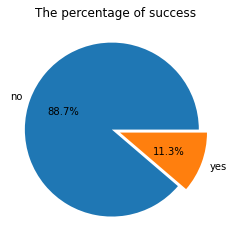

In [53]:
# marketing_df.groupby('y').size().sort_values(ascending=False).plot.pie(figsize=(15, 4),title = 'Target',autopct='%1.2f%%');
data = marketing_df.groupby('y').size().sort_values(ascending=False)
plt.pie(x=data , autopct="%.1f%%", explode=[0.05]*len(data), labels=data.index.tolist());
plt.title("The percentage of success");

# Visualization of the target

In [8]:
# đọc lại data:
marketing_df = pd.read_csv(file_path, sep=';')

### Summary

Bộ Data được lấy từ một nghiên cứu vào năm 2014 của  UCI Machine Learning Repository dùng để dự đoán sự thành công của chiến dịch marketing bằng hình thức gọi điện của 1 ngân hàng ở Thổ Nhĩ Kỳ. Khảo sát tổng quan dữ liệu, ta nhận thấy:
1. Bộ dữ liệu có 41188 dòng và 21 cột, trong đó có 10 biến số và 11 biến phân loại. Ngoài ra, các biến này chứa các dữ liệu về khách hàng, thông tin về marketing và các chỉ số kinh tế và xã hội của khách hàng.
2. Bộ dữ liệu có 12 dòng trùng nhau, chiếm tỉ lệ rất nhỏ
3. Bộ dữ liệu có 88.7% nhãn 'no' và 11.3% nhãn 'yes', điều này chỉ ra rằng bộ dữ liệu nghiên cứu không cân bằng giữ tỉ lệ các kết quả thu được. Nó đồng thời cũng cho thấy rằng ngân hàng này đã thực hiện chiến dịch call marketing này một cách không tính toán nên tỉ lệ thành công thật sự thấp.

### Missing
1. Cột 'pdays', giá trị missing '999' chiếm rất cao (96.32%)
2. Cột 'poutcome' có tỉ lện missing đứng thứ nhì (86.34)
3. Cột'default' có tỉ lệ missing là 20.87 xếp ở vị trí thứ 3
4. Các cột khác, tỉ lệ missing không đáng kể

### Thông tin chưa rõ
1. Các biến: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m	được thu thập dữ liệu như thế nào



## III. Data Exploration and Preparation

### Univariate Analysis

1. Trình bày các quan sát về phân phối của các biến

In [6]:
# Statistic các biến numerical:
marketing_df.describe()

# Khảo sát các thông số thống kê của các biến numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Statistic các biến categorical:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact', 'month', 'day_of_week', 'poutcome', 'y']
marketing_df.describe(include = 'object')

# Khảo sát các tham số thống kê của biến Categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


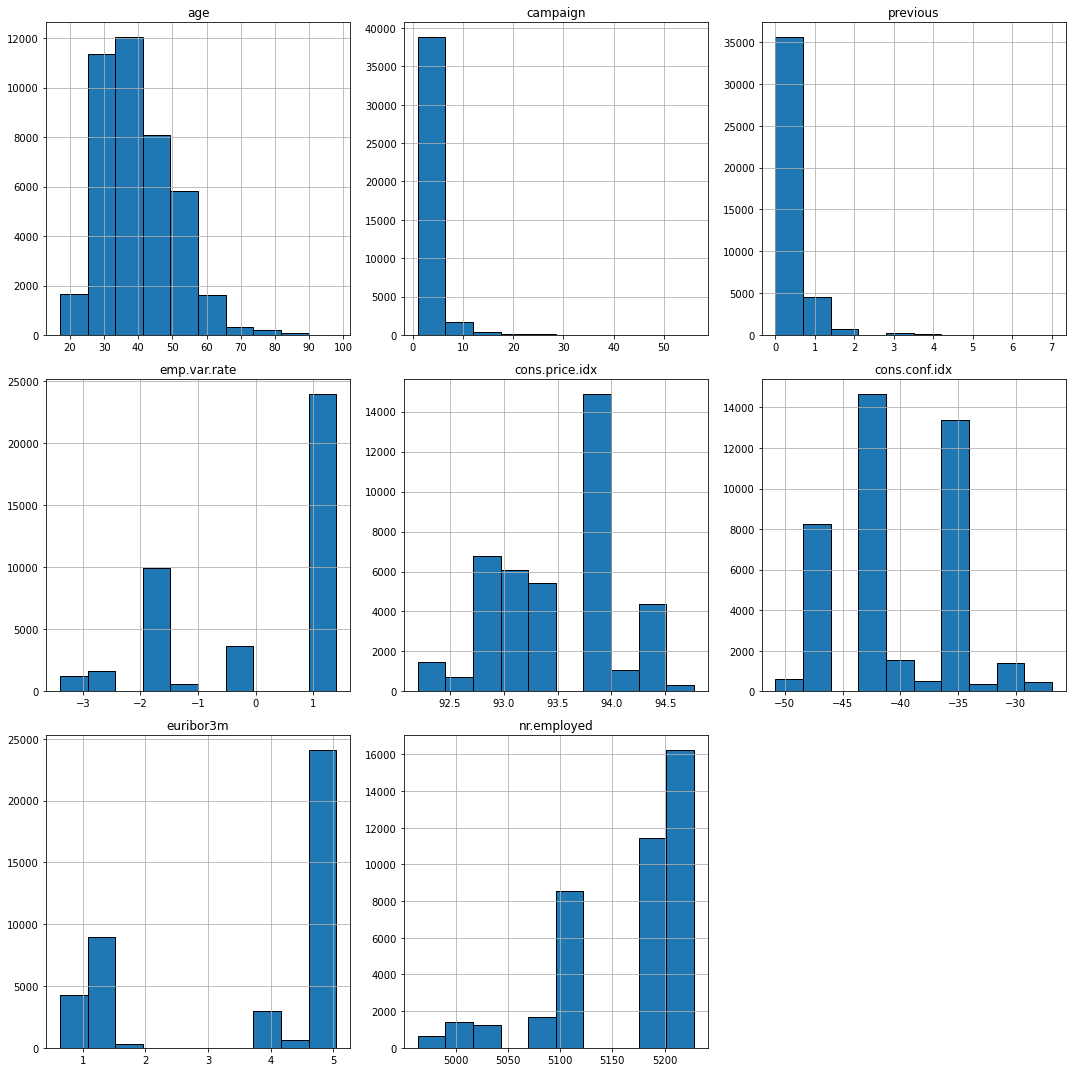

In [66]:
# Visualization các biến numerical:
# Bỏ biến 'duration' vì nó sẽ ảnh hưởng cao đến kết quả
numerical = ['age','campaign','previous', 
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
marketing_df[numerical].hist(figsize=(15,15),edgecolor='k', bins=10);
plt.tight_layout()
plt.show()

# Distribution các biến numerical:

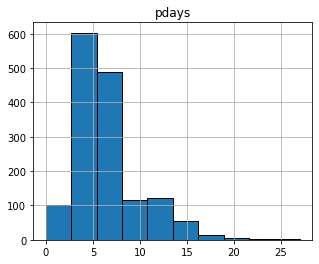

In [64]:
# Loại bỏ các giá trị '999' của pdays

data = marketing_df[marketing_df.pdays != 999]
plt.title('pdays')
data['pdays'].hist(figsize=(5,4),edgecolor='k', bins=10);

# Distribution of  'pdays'

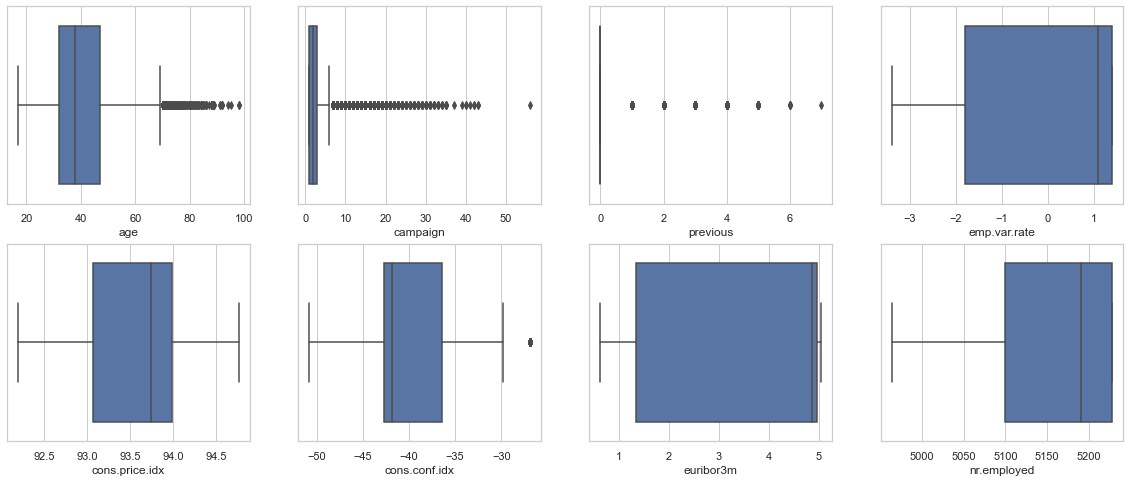

In [99]:
cols = ['age','campaign','previous', 
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# for col in numerical:
# marketing_df["age"].plot.box(figsize=(6,4),grid = True);
# plt.tight_layout()
# plt.show()

sns.set(style='whitegrid')
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(data = marketing_df, x = i, ax=subplot);

    
# Boxplot để xem thử có outlier ko

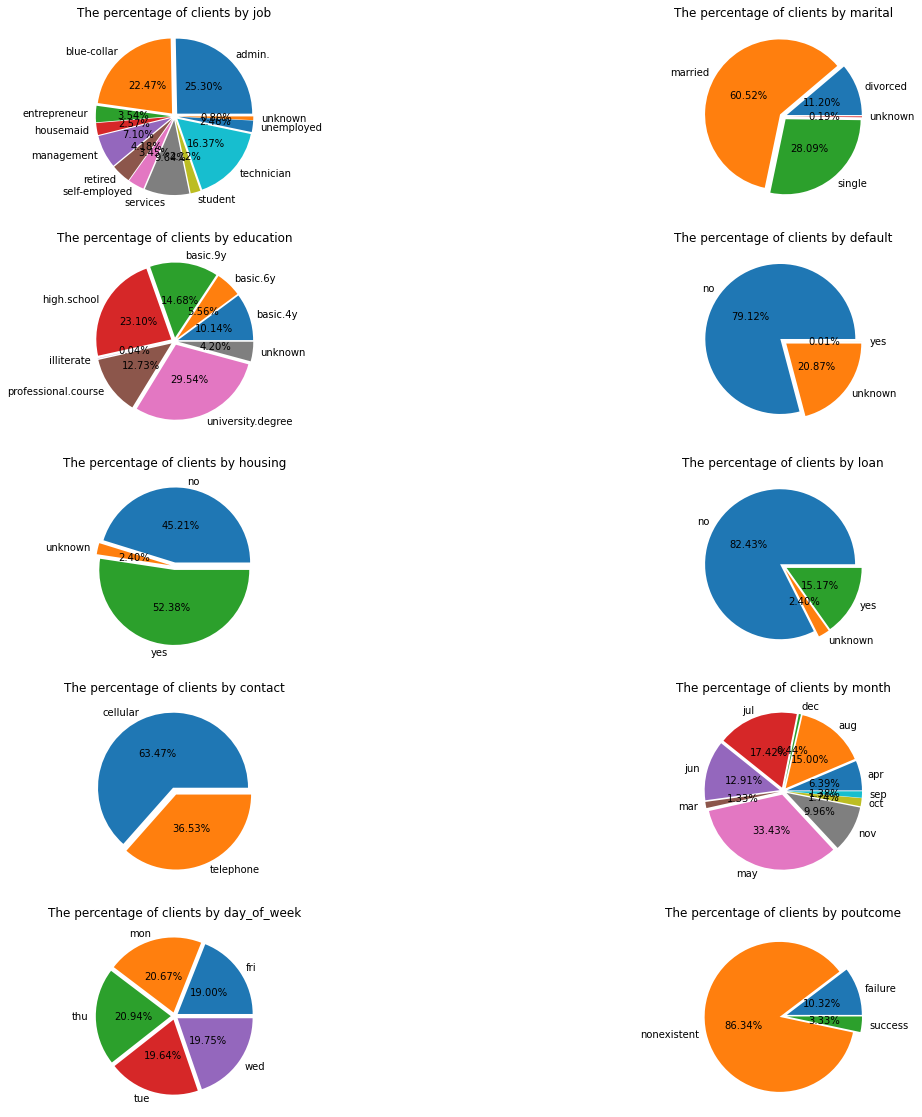

In [67]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact', 'month', 'day_of_week', 'poutcome']
target = 'y'

pie, ax = plt.subplots(5,2,figsize=[20,20])
for i, subplot in zip(categorical, ax.flatten()):
    data = marketing_df.groupby(i).size()
    subplot.pie(x=data , autopct="%.2f%%", explode=[0.05]*len(data), labels=data.index.tolist(), pctdistance=0.5)
    subplot.set(title = 'The percentage of clients by '+str(i) )
    
# Visualization các biến categorical:

2. Bộ Data có các điểm nào cần chú ý (để thực hiện trong bước Data Processing)

Numerical variables's Summary
* Đa số khách hàng ở độ tuổi từ 30 - 50 tuổi
* Đa số chưa được tiếp xúc qua điện thoại ở các chiến dịch quảng cáo trc đó
* Đối với chiến dịch tiếp thị hiện tại, đa số các khách hàng chưa được tiếp xúc qua điện thoại lần nào
* Các biến social/economic variable chưa rõ
* Đối với những clients xác định đc ngày liên hệ gần nhất, đa số nằm trong khoảng 4-7 ngày

Đa số khách hàng được gọi điện có:
* Công việc chủ yếu là blue-collar (công nhân), admin, technician, đã có gia đình và chưa có thẻ tín dụng và đa số không có các khoản nợ cá nhân
* khoảng 65% khách hàng được call qua cellular
* Không có sự phân biệt rõ ràng giữa các giá trị day_of_week của cuộc gọi gần nhất, nhưng có sự khác nhau về month của nó. Có đến 1/3 số cuộc gọi gần nhất được thực hiện trong tháng 5

Những chú ý:
* Cột 'duration' sẽ không được quan tâm trong quá trình phân tích và xử lý
* Tỉ lệ Missing rất cao trong cột 'pdays' và 'poutcome'
* Outlier 


### Multivariate Analysis

1. Trình bày các tương tác thú vị giữa các biến, giải thích thêm theo ý kiến và suy nghĩ của bạn

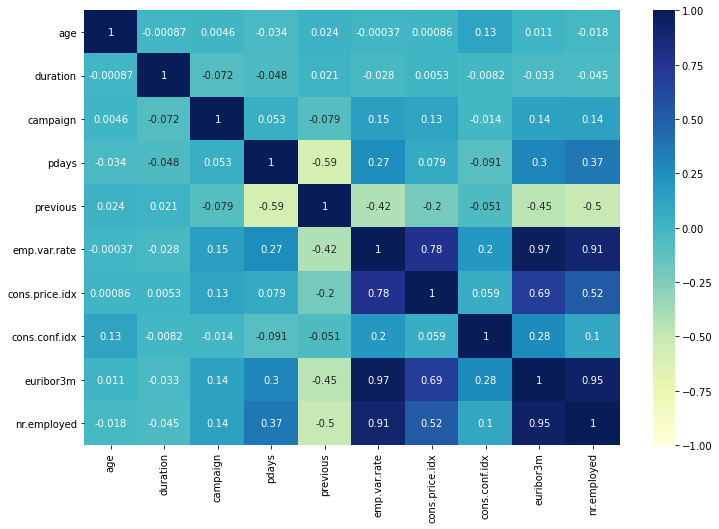

In [80]:
def show_correlation_matrix(df, vmin_val = -1, vmax_val = 1):
    f, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(df.corr(),cmap = "YlGnBu",  annot=True ,vmin= vmin_val, vmax = vmax_val)
    plt.show()

cols = ['age','campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']
data = marketing_df
show_correlation_matrix(marketing_df,vmin_val = -1)
# Ma trận tương quan giữa các biến

2. Tự đặt các giả thuyết về yếu tố ảnh hướng (trong bộ data) và làm các bước phân tích, vẽ các biểu đồ để tìm hiểu các giả thuyết đó.